<a href="https://colab.research.google.com/github/svgoudar/My-Data-Science-Roadmap/blob/main/ML/Supervised%20Learning/Regression/Linear%20Regression/4.Variance%20Bias%20Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Bias–Variance Tradeoff** is a core concept in machine learning that explains the balance between **underfitting** and **overfitting**.

---

## 1️⃣ **Bias**

* **Definition**: Error caused by simplifying a model too much and ignoring real patterns in the data.
* **High Bias** → Model is too simple → **Underfitting**.
* Example: Using a straight line to fit a highly curved pattern.
* Effect: Predictions are consistently wrong in the same direction.

---

## 2️⃣ **Variance**

* **Definition**: Error caused by making a model too complex and fitting even the noise in the training data.
* **High Variance** → Model is too sensitive to small changes in the data → **Overfitting**.
* Example: A polynomial of degree 15 fitting just 10 data points.
* Effect: Model performs well on training data but poorly on unseen data.

---

## 3️⃣ **The Tradeoff**

* Increasing **model complexity** → **Bias decreases**, **Variance increases**.
* Decreasing **model complexity** → **Bias increases**, **Variance decreases**.
* **Goal**: Find the “sweet spot” where both bias and variance are low enough to minimize **total error**.

---

## 4️⃣ **Error Decomposition**

The **total error** in a model can be expressed as:

$$
\text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
$$

* **Bias²**: Squared error from wrong assumptions.
* **Variance**: Error from sensitivity to training data.
* **Irreducible Error**: Noise in the data we can’t remove.

---

## 5️⃣ **Visual Representation**

Imagine a dartboard 🎯:

* **High Bias, Low Variance**: All darts land far from the bullseye, but close to each other (consistently wrong).
* **Low Bias, High Variance**: Darts scatter all over the board (inconsistent).
* **High Bias, High Variance**: Darts are scattered and far from the bullseye.
* **Low Bias, Low Variance**: Darts cluster around the bullseye (ideal model).


## **1️⃣ Formula for Bias–Variance Tradeoff**

The expected squared error at a point $x$ is:

$$
E[(y - \hat{f}(x))^2] = \underbrace{[\text{Bias}(\hat{f}(x))]^2}_{\text{Error from wrong assumptions}}
+ \underbrace{\text{Variance}(\hat{f}(x))}_{\text{Error from sensitivity to data}}
+ \underbrace{\sigma^2}_{\text{Irreducible error (noise)}}
$$

Where:

* $\hat{f}(x)$ = predicted value from the model.
* $y$ = true value.
* $\sigma^2$ = variance of noise in the data.



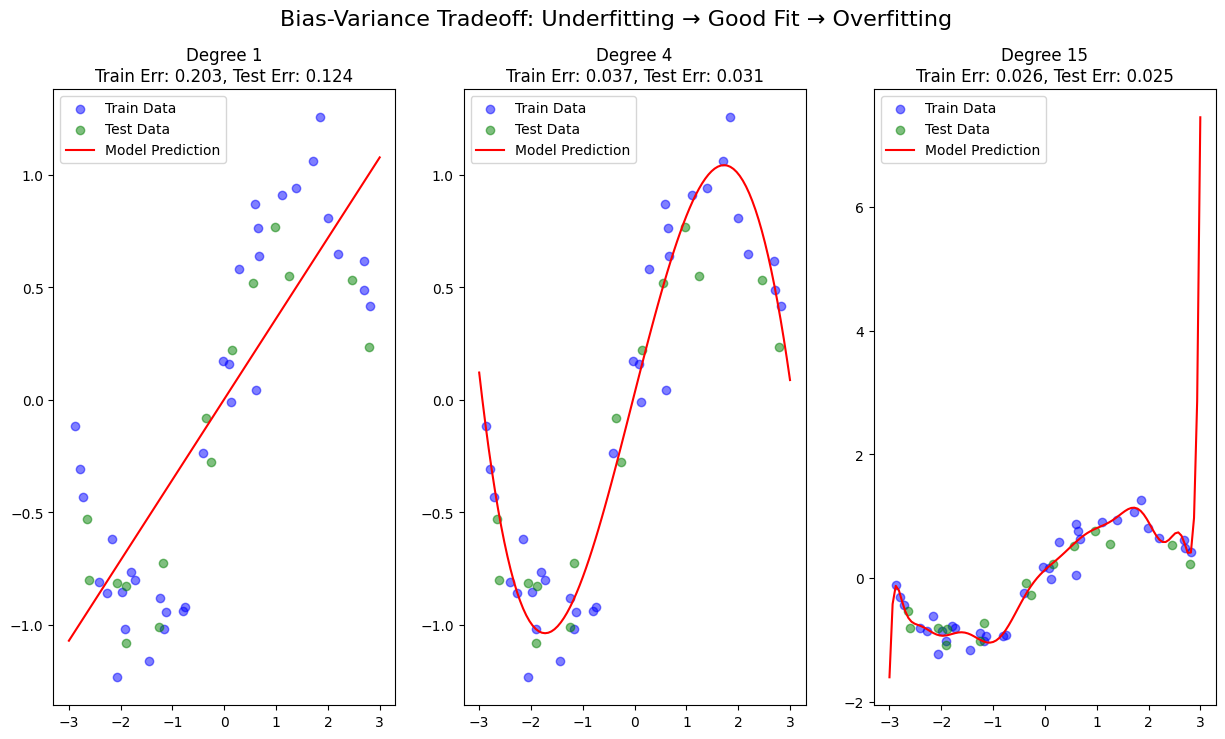

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.sort(np.random.rand(50) * 6 - 3)[:, np.newaxis]  # -3 to 3 range
y = np.sin(X) + np.random.normal(0, 0.2, X.shape)  # sin curve + noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

degrees = [1, 4, 15]  # Low, medium, high complexity
plt.figure(figsize=(15, 8))

for i, degree in enumerate(degrees, 1):
    # Polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)

    # Error calculation (as proxy for bias & variance)
    train_error = mean_squared_error(y_train, y_pred_train)
    test_error = mean_squared_error(y_test, y_pred_test)

    # Plot
    plt.subplot(1, 3, i)
    X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    plt.scatter(X_train, y_train, color="blue", alpha=0.5, label="Train Data")
    plt.scatter(X_test, y_test, color="green", alpha=0.5, label="Test Data")
    plt.plot(X_range, y_range_pred, color="red", label="Model Prediction")
    plt.title(f"Degree {degree}\nTrain Err: {train_error:.3f}, Test Err: {test_error:.3f}")
    plt.legend()

plt.suptitle("Bias-Variance Tradeoff: Underfitting → Good Fit → Overfitting", fontsize=16)
plt.show()


## **3️⃣ How to Read the Results**

* **Degree 1** → High Bias: The line is too simple to capture the sine curve → Underfits → Both train & test errors high.
* **Degree 4** → Low Bias, Low Variance: Fits well without overfitting → Sweet spot → Errors are low.
* **Degree 15** → Low Bias but High Variance: Fits noise in training data → Train error low, test error high → Overfits.
